In [13]:
import os
import os.path as osp
import numpy as np
import shutil
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image


res = {}
cnt = 0
display_size = 480

In [3]:
use_dalle = False
dalle_suf = '_dalle' if use_dalle else ''

Sample and select raw outputs

base1B/coke_bottle.png


<Figure size 640x480 with 0 Axes>

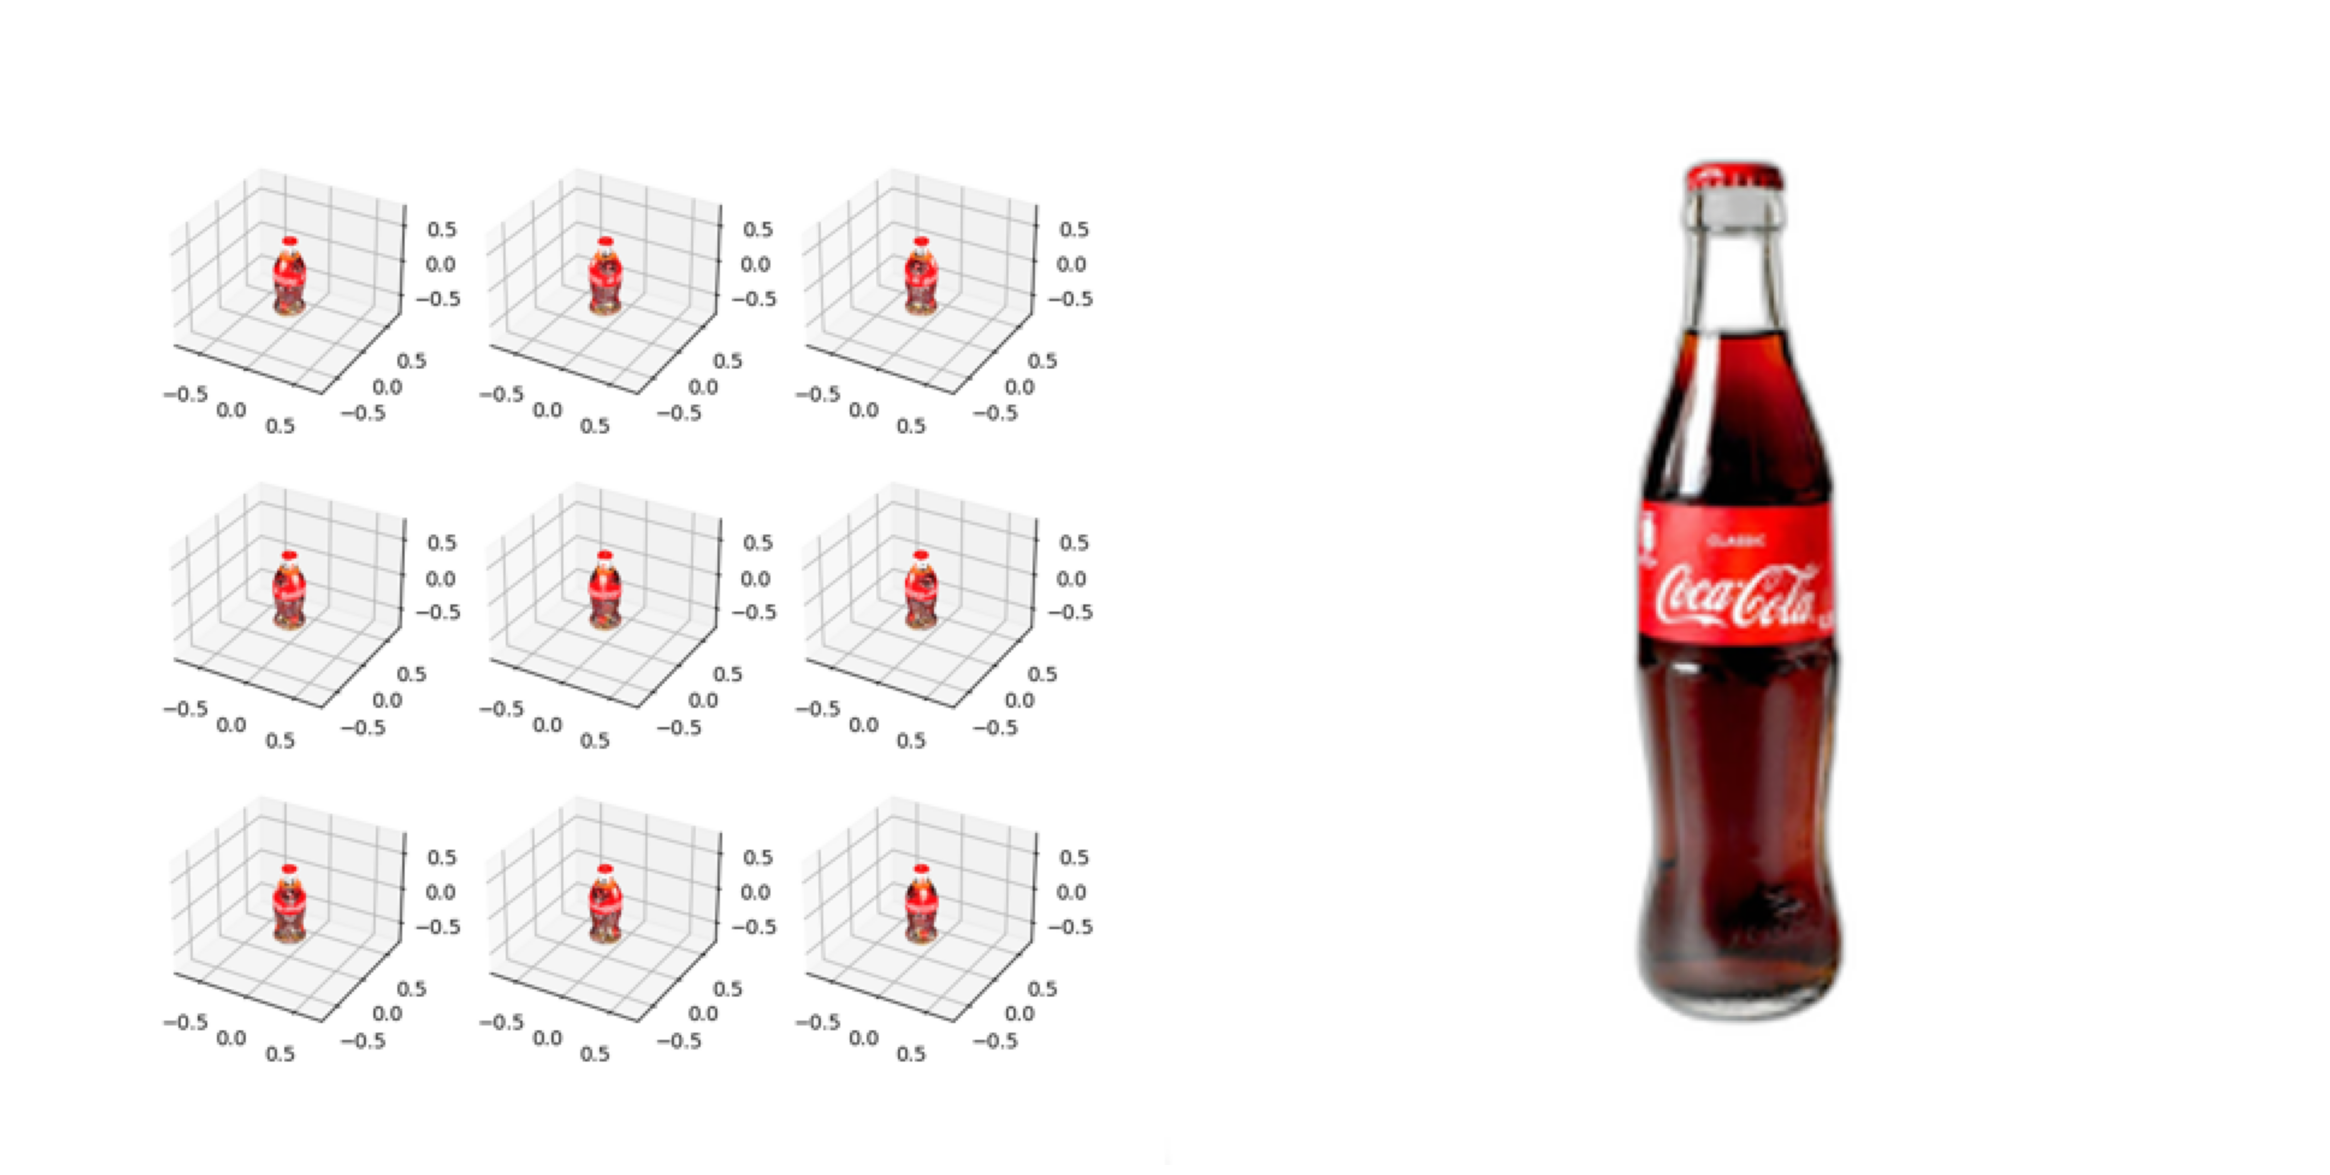

In [17]:
select_num = 25
img_paths = {model_name: (f'images/pc{dalle_suf}/{model_name}/img', f'images/postprocessed{dalle_suf}') for model_name in ['base300M', 'base1B']}
tot = len(img_paths) * select_num

for model_name, (pc_img_path, post_img_path) in img_paths.items():
    # filenames = os.listdir(pc_img_path)
    filenames = os.listdir('images/original')
    filenames = np.random.choice(filenames, select_num, replace=False)
    for filename in filenames:
        clear_output(wait=True)
        print(f'{model_name}/{filename}')
        pc_npy = np.array(Image.open(osp.join(pc_img_path, filename)).resize((display_size, display_size)))
        post_npy_3 = np.array(Image.open(osp.join(post_img_path, filename)).resize((display_size, display_size)))
        post_npy_4 = np.ones((post_npy_3.shape[0], post_npy_3.shape[1], 4), dtype=np.uint8) * 255
        post_npy_4[:, :, :3] = post_npy_3
        plt.clf()
        fig = plt.figure(figsize=(30, 15))
        plt.imshow(np.concatenate([pc_npy, post_npy_4], axis=1))
        plt.axis('off')
        plt.show()
        user_input = input("1 to indicate image is good, 0 otherwise")
        if user_input in ["0", "1"]:
            res[f'{model_name}/{filename}'] = bool(int(user_input))
        elif user_input in ["q"]:
            raise KeyboardInterrupt
        else:
            print('Invalid input')

In [18]:
selected_path = 'selected_color_pc'
for key, value in res.items():
    if value:
        model_name, filename = osp.splitext(key)[0].split('/')
        print(model_name, filename)
        fields = [('npy', 'npy'), ('img', 'png')]
        for folder, extension in fields:
            original_filename = f'images/pc{dalle_suf}/{model_name}/{folder}/{filename}.{extension}'
            new_filename = f'{selected_path}/{folder}/{model_name}_{filename}.{extension}'
            os.makedirs(osp.dirname(new_filename), exist_ok=True)
            shutil.copyfile(original_filename, new_filename)

base300M quill_and_ink
base300M british_telephone_booth
base300M bouquet_of_roses
base300M guitar
base300M panda
base300M shrek
base300M snail
base300M mario
base300M family_of_deer
base300M toothless_from_how_to_train_your_dragon
base1B snail
base1B digital_slr_camera_on_a_tripod
base1B british_telephone_booth
base1B princess_peach
base1B octopus
base1B guitar
base1B blue_whale
base1B quill_and_ink
base1B coke_bottle


Check whether monochrome outputs still look good

In [7]:
with open('good_color_clouds.txt', 'w') as f:
    for filename in sorted(os.listdir('selected_color_pc/npy')):
        f.write(osp.splitext(filename)[0] + '\n')

In [8]:
from point_e.util.point_cloud import PointCloud
from point_e.util.plotting import plot_point_cloud

grayscale_res = {}

base1B_a_battery_recharging_itself_with_solar_panels


<Figure size 640x480 with 0 Axes>

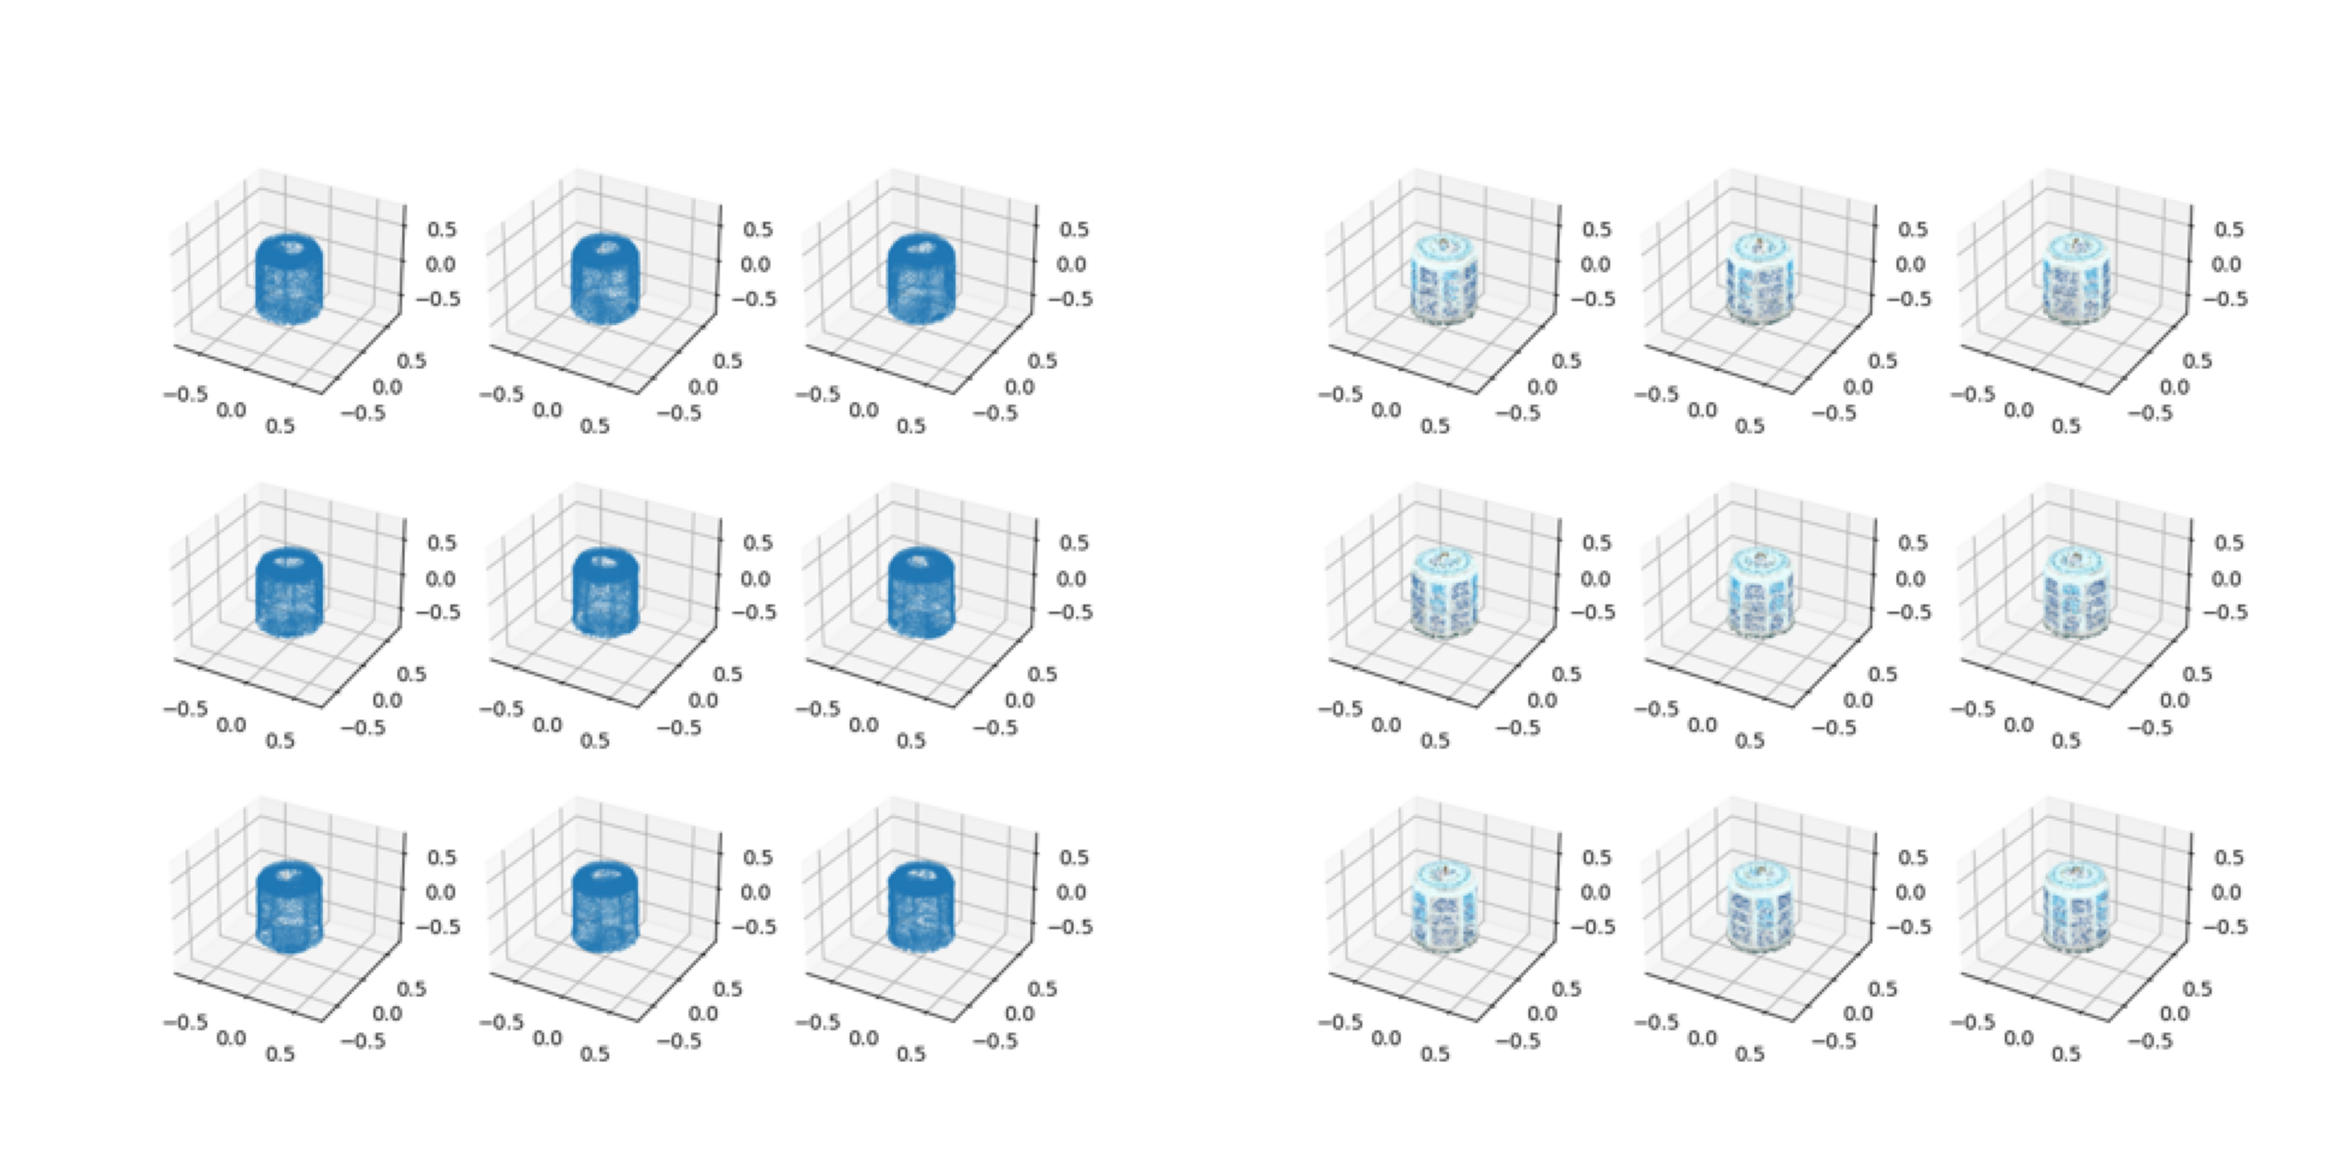

In [15]:
with open('good_monochrome_clouds.txt', 'w') as f:
    for filename in os.listdir('selected_color_pc/npy'):
        clear_output(wait=True)
        filename = osp.splitext(filename)[0]
        print(filename)
        
        pc_npy = np.load(osp.join('selected_color_pc/npy', filename + '.npy'))
        pc = PointCloud(pc_npy[:, :3], {'R': pc_npy[:, 3], 'G': pc_npy[:, 4], 'B': pc_npy[:, 5]})
        plt.clf()
        fig = plot_point_cloud(pc, color=False, grid_size=3, dot_size=0.1, fixed_bounds=((-0.75, -0.75, -0.75), (0.75, 0.75, 0.75)))
        plt.savefig('tmp.png')
        plt.close()

        monochrome_img = np.array(Image.open('tmp.png').resize((display_size, display_size)))
        color_img = np.array(Image.open(osp.join('selected_color_pc/img', filename + '.png')).resize((display_size, display_size)))
        plt.clf()
        fig = plt.figure(figsize=(30, 15))
        plt.imshow(np.concatenate([monochrome_img, color_img], axis=1))
        plt.axis('off')
        plt.show()
        
        user_input = input("1 to indicate image is good, 0 otherwise")
        if user_input in ["0", "1"]:
            grayscale_res[filename] = bool(int(user_input))
        elif user_input in ["q"]:
            raise KeyboardInterrupt
        else:
            print('Invalid input')
        
        if grayscale_res[filename]:   
            npy_old_fname = f'selected_color_pc/npy/{filename}.npy'         
            npy_new_fname = f'selected_monochrome_pc/npy/{filename}.npy'
            img_old_fname = 'tmp.png'
            img_new_fname = f'selected_monochrome_pc/img/{filename}.png'
            os.makedirs(osp.dirname(npy_new_fname), exist_ok=True)
            os.makedirs(osp.dirname(img_new_fname), exist_ok=True)
            shutil.copyfile(npy_old_fname, npy_new_fname)
            shutil.copyfile(img_old_fname, img_new_fname)
        os.remove('tmp.png')